# **Analyse du risque de crise cardiaque**

*Ce dataset a été récupéré sur Kaggle à l'adresse :* 
[*Heart Attack analysis prediction*](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data).

### **<span style="color: #DC143C">Description</span>**

Ce dataset contient les colonnes suivantes : 

- **age**: Age of the patient
- **sex**: Sex of the patient
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **ca**: number of major vessels (0-3)
- **cp**: Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **trtbps**: resting blood pressure (in mm Hg)
- **chol**: cholestoral in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **rest_ecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: maximum heart rate achieved
- **target**
    - 0 = less chance of heart attack
    - 1 = more chance of heart attack

### **<span style="color: #DC143C">Objectif</span>**

A partir des données récoltées sur les patients, nous aurons pour objectif de **prédire s'il y a *plus* ou *moins* de risque de crise cardiaque**.

### **<span style="color: #DC143C">Plan</span>**

1. **Prétraitement des données**
2. **Visualisation des données**
3. **Sélection d'un modèle**
4. **Optimisation du modèle**

## **<span style="color: #40E0D0">1. Prétraitement des données</span>**

### **<span style="color: #DC143C">A. Chargement des données</span>**

Les données des patients ainsi que leur étiquette sont réunies dans le dataset *heart.csv* du dossier *data*.  

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np

In [2]:
# Chargement des données
data = pd.read_csv("data/heart.csv", sep=",")

# Affichage des données
print("\nLe tableau a les dimensions suivantes : ", data.shape,"\n")
data.head()


Le tableau a les dimensions suivantes :  (303, 14) 



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nous retrouvons bien les colonnes décrites ci-dessus.

### **<span style="color: #DC143C">B. Première approche des données</span>**

In [3]:
# Affichage des informations sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Affichage des statistiques descriptives
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


D'après ces informations, toutes les colonnes sont numériques.   
De plus, il n'y a pas de valeurs manquantes.  

Il n'y a **pas de pré-traitement absolument nécessaire à faire**.

## **<span style="color: #40E0D0">2. Visualisation des données</span>**

In [5]:
# Chargement des librairies
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

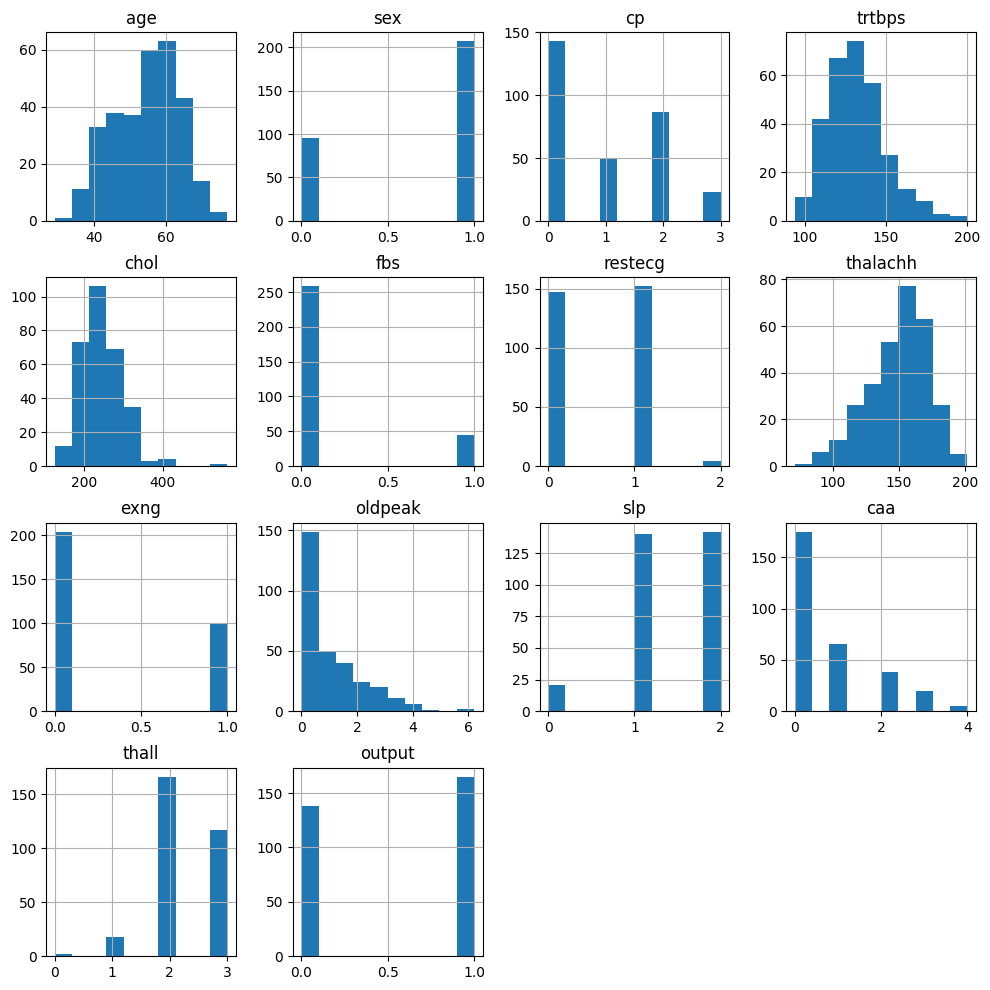

In [6]:
# Affichage des histogrammes
data.hist(figsize=(12,12))

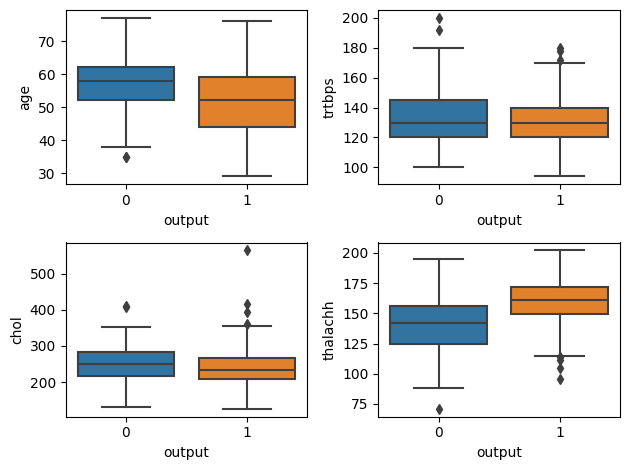

In [7]:
# Affichage de boxplots pour les variables age, trtbps, chol et thalachh
colonnes = ["age", "trtbps", "chol", "thalachh"]

for index, nom in enumerate(colonnes):
    plt.subplot(2, 2, index+1)
    sns.boxplot(x="output", y=nom, data=data)
    plt.tight_layout()

## **<span style="color: #40E0D0">3. Sélection d'un modèle</span>** 

### **<span style="color: #DC143C">A. Création des sets d'apprentissage et de test</span>**

In [8]:
# Séparation de la variable cible et des variables explicatives
X = data.drop("output", axis=1)
y = data["output"]

# Visualisation de la variable cible
y.value_counts()

1    165
0    138
Name: output, dtype: int64

On n'observe pas de gros déséquilibre dans les données.

In [9]:
# Séparation des données en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("Le format des données d'entrainement est : ", X_train.shape)
print("Le format des données de test est : ", X_test.shape)

Le format des données d'entrainement est :  (242, 13)
Le format des données de test est :  (61, 13)


### **<span style="color: #DC143C">B. Test sur différents modèles</span>**

Dans cette partie, nous allons tester différents classifieurs :
- Random Forest
- Gradient Boosting
- Hist Gradient Boosting
- Logistic Regression
- Support Vector
- XGBoost

Les métriques pour évaluer leurs performances sont l'**accuracy**, la **précision**, le **rappel** et le **score F1**.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

clf_rf  = RandomForestClassifier(random_state=0)
clf_gb  = GradientBoostingClassifier(random_state=0)
clf_hgb = HistGradientBoostingClassifier(random_state=0)
clf_lr  = LogisticRegression(random_state=0)
clf_svc = SVC(random_state=0)
clf_xgb = XGBClassifier(random_state=0)

list_model = [clf_rf, clf_gb, clf_hgb, clf_lr, clf_svc, clf_xgb]

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_model(list_model, X_train, y_train, X_test, y_test):
    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print("\n", model, "\n")
        print("   - Accuracy : ", accuracy)
        print("   - Precision : ", precision)
        print("   - Recall : ", recall)
        print("   - F1 : ", f1)

train_model(list_model, X_train, y_train, X_test, y_test)


 RandomForestClassifier(random_state=0) 

   - Accuracy :  0.8524590163934426
   - Precision :  0.8484848484848485
   - Recall :  0.875
   - F1 :  0.8615384615384615

 GradientBoostingClassifier(random_state=0) 

   - Accuracy :  0.7704918032786885
   - Precision :  0.8
   - Recall :  0.75
   - F1 :  0.7741935483870969

 HistGradientBoostingClassifier(random_state=0) 

   - Accuracy :  0.819672131147541
   - Precision :  0.8620689655172413
   - Recall :  0.78125
   - F1 :  0.8196721311475409

 LogisticRegression(random_state=0) 

   - Accuracy :  0.8852459016393442
   - Precision :  0.8787878787878788
   - Recall :  0.90625
   - F1 :  0.8923076923076922

 SVC(random_state=0) 

   - Accuracy :  0.7049180327868853
   - Precision :  0.6666666666666666
   - Recall :  0.875
   - F1 :  0.7567567567567567


c:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...) 

   - Accuracy :  0.819672131147541
   - Precision :  0.8620689655172413
   - Recall :  0.78125
   - F1 :  0.8196721311475409


L'algorithme d'optimisation du classifieur de régression logistique n'a pas convergé ce qui signigie qu'il n'a pas réussi à atteindre une solution stable dans le nombre maximum d'itérations défini (100 par défaut). Nous rejetons donc ce modèle.

Le classifieur ayant les meilleurs performances est donc le random forest.  

Dans la prochaine partie, nous allons essayer d'optimiser les hyperparamètres de ce modèle.

## **<span style="color: #40E0D0">4. Optimisation des paramètres</span>** 

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

def optimisation(clf, param_grid, X_train, y_train, X_test, y_test):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    print(f"Meilleurs paramètres (CV score = {grid.best_score_}) :")
    print(grid.best_params_)
    
    y_pred = grid.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    
    return grid.cv_results_

Meilleurs paramètres (CV score = 0.8306122448979592) :
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


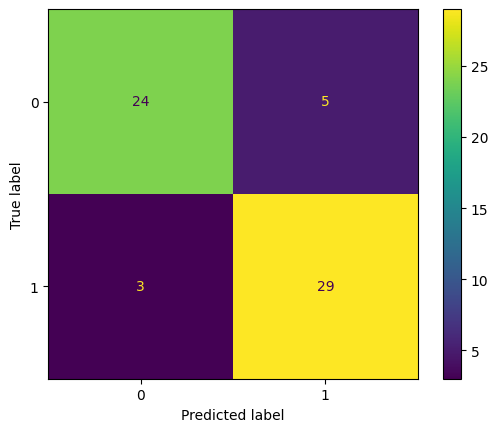

In [21]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [i for i in range(1, 11)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

results = optimisation(clf_rf, param_grid, X_train, y_train, X_test, y_test)

In [25]:
results = pd.DataFrame(results)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094199,0.011529,0.007983,0.007246,1,1,2,50,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.816327,0.775510,0.854167,0.729167,0.854167,0.805867,0.048124,108
1,0.190581,0.043462,0.013405,0.006653,1,1,2,100,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.795918,0.795918,0.854167,0.750000,0.833333,0.805867,0.035795,108
2,0.267914,0.014351,0.020792,0.004573,1,1,2,200,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.795918,0.775510,0.833333,0.750000,0.812500,0.793452,0.028877,233
3,0.072053,0.005548,0.006372,0.007855,1,1,5,50,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.816327,0.775510,0.854167,0.729167,0.854167,0.805867,0.048124,108
4,0.141527,0.022180,0.018305,0.006237,1,1,5,100,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.795918,0.795918,0.854167,0.750000,0.833333,0.805867,0.035795,108


In [28]:
# Sélection de param_max_depth pour les valeurs de param_n_estimators = 50 et param_min_samples_split = 2 et param_min_samples_leaf = 2
x_50 = results[results["param_n_estimators"]==50][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]
# Sélection des colonnes param_max_depth et mean_test_score
depth_50 = x_50[["param_max_depth"]]
accuracy_50 = x_50[["mean_test_score"]]


# Sélection de param_max_depth pour les valeurs de param_n_estimators = 50 et param_min_samples_split = 2 et param_min_samples_leaf = 2
x_100 = results[results["param_n_estimators"]==100][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]
# Sélection des colonnes param_max_depth et mean_test_score
depth_100 = x_100[["param_max_depth"]]
accuracy_100 = x_100[["mean_test_score"]]

# Sélection de param_max_depth pour les valeurs de param_n_estimators = 50 et param_min_samples_split = 2 et param_min_samples_leaf = 2
x_200 = results[results["param_n_estimators"]==200][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]
# Sélection des colonnes param_max_depth et mean_test_score
depth_200 = x_200[["param_max_depth"]]
accuracy_200 = x_200[["mean_test_score"]]

C:\Users\corne\AppData\Local\Temp\ipykernel_5588\165479302.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_50 = results[results["param_n_estimators"]==50][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]
C:\Users\corne\AppData\Local\Temp\ipykernel_5588\165479302.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_100 = results[results["param_n_estimators"]==100][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]
C:\Users\corne\AppData\Local\Temp\ipykernel_5588\165479302.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_200 = results[results["param_n_estimators"]==200][results["param_min_samples_split"]==2][results["param_min_samples_leaf"]==2]


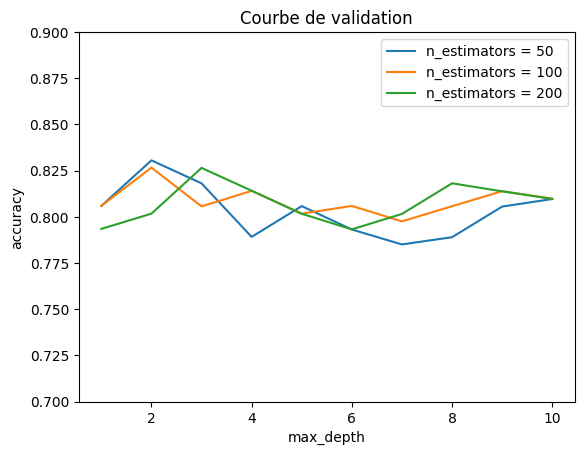

In [32]:
# Courbe de validation avec une échelle verticale de 0 à 1
plt.plot(depth_50, accuracy_50, label="n_estimators = 50")
plt.plot(depth_100, accuracy_100, label="n_estimators = 100")
plt.plot(depth_200, accuracy_200, label="n_estimators = 200")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.ylim(0.7, 0.9)
plt.legend()
plt.title("Courbe de validation")
plt.show()